In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import nltk
import os
import re
import string
import urllib.request
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation
from heapq import nlargest
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from collections import defaultdict
import string
from nltk.stem.wordnet import WordNetLemmatizer
glovef="glove.6B.300d.txt"
import radom

In [3]:
df = pd.read_csv (r'transcripts.csv')
#df="today i had a dinner and it was delicious . i am getting fat by eating this fast foods. these days I go for running every morning at 6 am and there is no one in the streets. when i start to study my mind go for hydroxid aluminum section i saw on class."
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))
excluder = set(string.punctuation)
wordembd ={}
df.shape
df.head()


,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [5]:
print( len(df.transcript), " speeches are available to summarize")

2467  speeches are available to summarize


In [6]:
print("Loading Glove Model")
f = open(glovef, encoding="utf8")
model = {}
for line in f:
    splitLine = line.split()
    word = splitLine[0]
    embedding = np.asarray(splitLine[1:], dtype='float32')
    model[word] = embedding
print("Done.",len(model)," words loaded!")
y=int(input())
print(y)

Loading Glove Model
Done. 400000  words loaded!
2
2


In [9]:
b={}
l=len(df.transcript)
for i in range (y):
    R=random.randint(0,l)
    b[i]=R
print(b)

{0: 1795, 1: 1413}


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
[[0.    0.672 0.783 ... 0.712 0.675 0.   ]
 [0.672 0.    0.89  ... 0.878 0.741 0.   ]
 [0.783 0.89  0.    ... 0.909 0.823 0.   ]
 ...
 [0.712 0.878 0.909 ... 0.    0.83  0.   ]
 [0.675 0.741 0.823 ... 0.83  0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


C:\Users\faramarz z\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


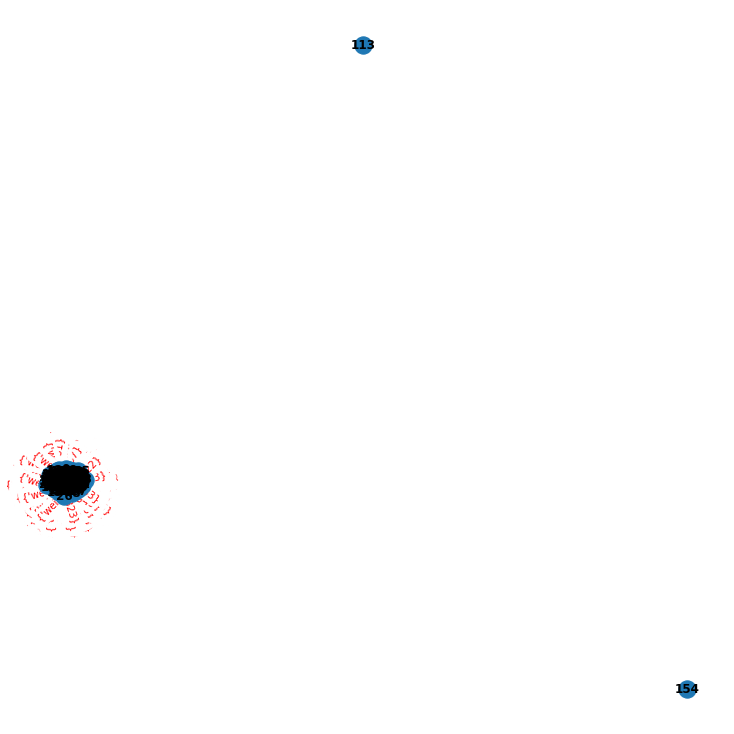

But in another sense, it's an incredibly complicated object that we need relatively exotic physics to describe, and in some sense represents the breakdown of our physical understanding of the universe.But today, the way I want you to understand a black hole, for the proof of a black hole, is to think of it as an object whose mass is confined to zero volume.
Again, a source of energy that's very difficult to explain if you just think that galaxies are composed of stars.So, what people have thought is that perhaps there are supermassive black holes which matter is falling on to.
And since the mass determines the Schwarzschild radius, there is actually only one thing I really need to know.So, my job in convincing you that there is a black hole is to show that there is some object that's confined to within its Schwarzschild radius.
So, if I were to take the sun and compress it down to the scale of the University of Oxford, it would become a black hole.So, now we know what a Schwarzschild r

C:\Users\faramarz z\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


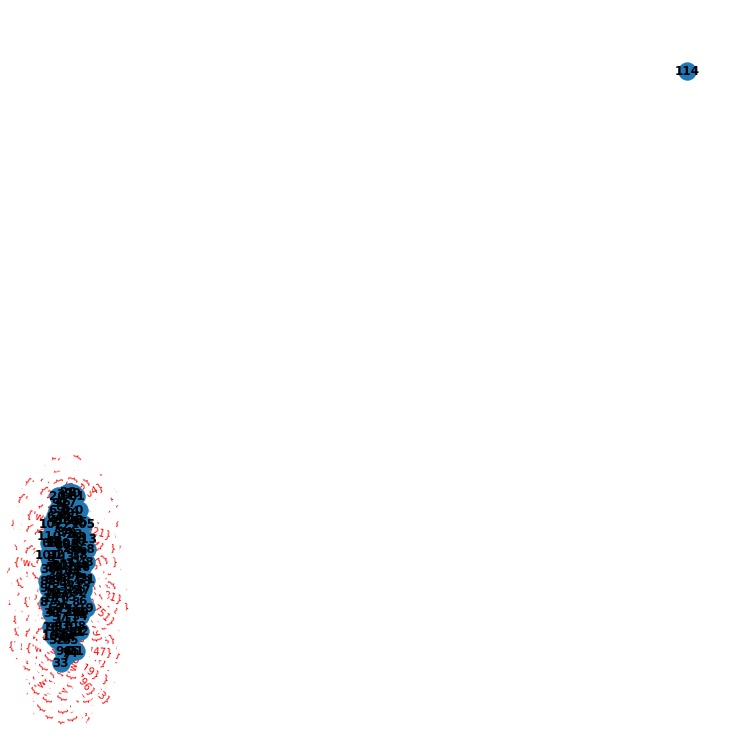

Far more effective, I have to say, than anything I later learned in law school.But over the course of these nine months, I grew frustrated with feeling like we were intervening too far downstream in the lives of our clients — that by the time they came to us, they were already in crisis.
And Health Leads is based on the presumption that for too long we have asked too little of our college students when it comes to real impact in vulnerable communities.
And that not only leads to a better set of clinical choices, but the doctor can also prescribe those resources for the patient, using Health Leads like any other sub-specialty referral.The problem is, once you get a taste of what it's like to realize your aspiration for healthcare, you want more.
But today we have a thousand college student advocates who are working to connect nearly 9,000 patients and their families with the resources that they need to be healthy.So 18 months ago I got this email that changed my life.
And over the cours

In [8]:
for j in range (0,(y)):
    dt=df.transcript[b[j]] 
    sentences = sent_tokenize(dt)
    def rem_ascii(s):
        return "".join()
    print(string.punctuation)
    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in sentences]
    dim=300
    svectors = []
    for i in stripped:
        if len(i) != 0:
            v = sum([model.get(w, np.zeros((dim,))) for w in i.split()])/(len(i.split())+0.001)
        else:
            v = np.zeros((dim,))
        svectors.append(v)
    
    similarity_matrix = np.zeros([len(stripped), len(stripped)])
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i != j:
                similarity_matrix[i][j] = cosine_similarity(svectors[i].reshape(1,dim),svectors[j].reshape(1,dim))[0,0]
    similarity_matrix = np.round(similarity_matrix,3)
    print(similarity_matrix)
    nx_graph = nx.from_numpy_array(similarity_matrix)
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
    plt.show()
    scores = nx.pagerank(nx_graph)
    ranked_sentences = sorted(((scores[i],i) for i,s in enumerate(sentences)), reverse=True) 
    arranged_sentences = sorted(ranked_sentences[0:int(len(sentences)*0.05)] )
    print("\n".join([sentences[x[1]] for x in arranged_sentences])) 
 